<a href="https://colab.research.google.com/github/harshadaborkar/GRIP-/blob/master/K_means_Clustering_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# K means Clustering is an unsupervised machine learning algorithm that will attemt to group similar clusters together in the data.
# We'll find the optimum number of clusters for k-means classification for Iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris = pd.read_csv('/content/drive/My Drive/Iris.csv',index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


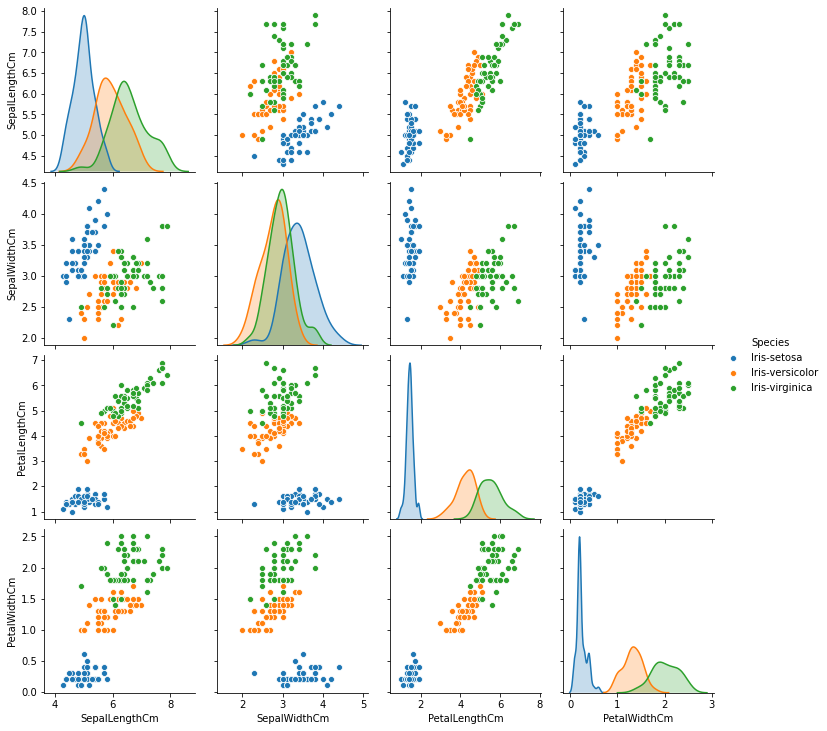

In [4]:
sns.pairplot(data=iris,hue='Species')#Here we can compare visually what elements kmeans assigns to the same group compared what elements belong to the same species.

In [ ]:
# K means Cluster (Creation)

In [8]:
x = iris.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans #import kmeans from SciKit Learn

wcss = []   #(wcss=within cluster sum of squares)

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [ ]:
# The Elbow Plot

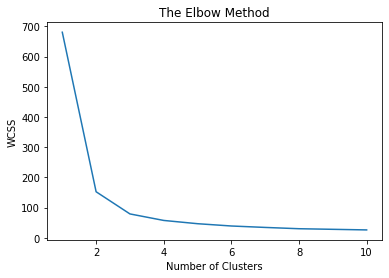

In [9]:
plt.plot(range(1,11),wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
# Here the elbow occurs between 2 and 3.i.e Around 3, wcss doesn't decrease significantly.
# So we can choose the optimal number of clusters here as '3'

In [ ]:
# Now we’ll categorize the data using the optimum number of clusters (3)

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)

y_pred = kmeans.fit_predict(x)


In [ ]:
# Visualization

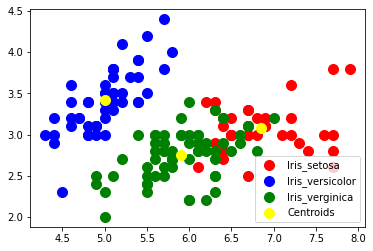

In [17]:
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], s=100, c='red', label= 'Iris_setosa')

plt.scatter(x[y_pred==1,0], x[y_pred==1,1], s=100, c='blue', label= 'Iris_versicolor')

plt.scatter(x[y_pred==2,0], x[y_pred==2,1], s=100, c='green', label= 'Iris_verginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow',label='Centroids') #Plotting centroids of the clusters

plt.legend()